<a href="https://colab.research.google.com/github/Indrajeet-007/Placement_Prediction/blob/main/Placement_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
data = pd.read_csv("/content/sample_data/student_placement_data.csv")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [168]:
data.shape

(215, 15)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [170]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [171]:
data.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [172]:
data['gender'] = data['gender'].replace('M', 1)
data['gender'] = data['gender'].replace('F', 0)
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [173]:
data['ssc_b'] = data['ssc_b'].replace('Others', 1)
data['ssc_b'] = data['ssc_b'].replace('Central', 0)
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,1,79.33,0,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,1,65.00,0,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,1,56.00,0,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,1,85.80,0,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [174]:
data['hsc_b'] = data['hsc_b'].replace('Others', 1)
data['hsc_b'] = data['hsc_b'].replace('Central', 0)
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [175]:
data['hsc_s'] = data['hsc_s'].replace('Commerce', 0)
data['hsc_s'] = data['hsc_s'].replace('Science', 1)
data['hsc_s'] = data['hsc_s'].replace('Arts', 2)
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,0,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,1,79.33,0,78.33,1,1,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,1,65.00,0,68.00,0,2,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,1,56.00,0,52.00,0,1,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,1,85.80,0,73.60,0,0,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [176]:
data['degree_t'] = data['degree_t'].replace('Sci&Tech', 0)
data['degree_t'] = data['degree_t'].replace('Comm&Mgmt', 1)
data['degree_t'] = data['degree_t'].replace('Others', 2)
data['workex'] = data['workex'].replace('Yes', 1)
data['workex'] = data['workex'].replace('No', 0)
data['specialisation'] = data['specialisation'].replace('Mkt&HR', 0)
data['specialisation'] = data['specialisation'].replace('Mkt&Fin', 1)
data['status'] = data['status'].replace('Not Placed', 0)
data['status'] = data['status'].replace('Placed', 1)
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,0,58.00,0,0,55.0,0,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,1,77.48,0,1,86.5,1,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,2,64.00,1,0,75.0,1,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,1,52.00,0,0,66.0,0,59.43,0,NaN
4,5,1,85.80,0,73.60,0,0,73.30,1,0,96.8,1,55.50,1,425000.0


In [177]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf



# Preprocess the data
X = data[["gender", "ssc_p", "ssc_b", "hsc_p","hsc_b","hsc_s","degree_p","degree_t","workex","etest_p","specialisation","mba_p"]]
y = data["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
input_shape = X_train.shape[1:]

model_1 = tf.keras.models.Sequential([

              # The first layer has 64 neurons(or units)
              tf.keras.layers.Dense(units=128, input_shape=input_shape, activation='relu'),

              # The second layer has 32 neurons

              tf.keras.layers.Dense(units=64, activation='relu'),

              # The third layer has 1 neuron and activation of sigmoid.
              # Because of sigmoid, the output of this layer will be a value bwteen 0 and 1
              tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model

model_1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics='accuracy')

# Train the model
history = model_1.fit(X_train, y_train, epochs=55, batch_size=10)

Epoch 1/55
18/18 [==============================] - 1s 2ms/step - loss: 0.6846 - accuracy: 0.5756
Epoch 2/55
18/18 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.7442
Epoch 3/55
18/18 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.7733
Epoch 4/55
18/18 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.7965
Epoch 5/55
18/18 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.8140
Epoch 6/55
18/18 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.8198
Epoch 7/55
18/18 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.8198
Epoch 8/55
18/18 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.8372
Epoch 9/55
18/18 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.8372
Epoch 10/55
18/18 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.8430
Epoch 11/55
18/18 [

In [178]:
def stepy(x):
    if x<0.6:
        return 0.0
    else :
        return 1.0

y_pred = model_1.predict(X_test)
# y_pred = stepy(y_pred)
y_pred = np.array([stepy(x) for x in y_pred])


print("predictions:",y_pred)
print(type(y_pred))

2/2 [==============================] - 0s 6ms/step
predictions: [1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [179]:
model_eval = model_1.evaluate(X_test, y_test)

# Printing the loss and accuracy

print('Test loss: {}\nTest accuracy:{}'.format(model_eval[0],model_eval[1]))

2/2 [==============================] - 0s 8ms/step - loss: 0.3109 - accuracy: 0.8837
Test loss: 0.3109259605407715
Test accuracy:0.8837209343910217


<Axes: >

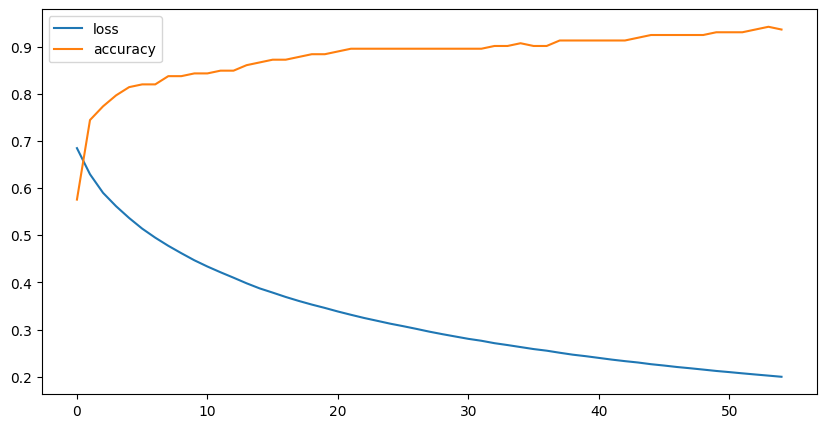

In [180]:
loss_acc_metrics_df = pd.DataFrame(history.history)
loss_acc_metrics_df.plot(figsize=(10,5))

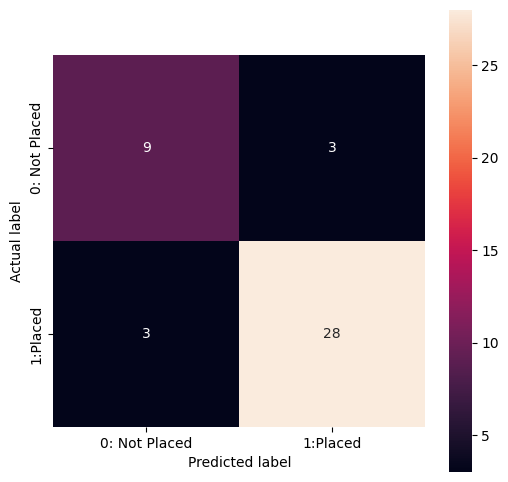

In [181]:
# Getting the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix

plt.figure(figsize=(6,6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0: Not Placed', '1:Placed'],
                        yticklabels=['0: Not Placed', '1:Placed'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [182]:
# Classification report: F1 score, Recall, Precision

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43

